In [2]:
import subprocess
import sys


def install(package):
    subprocess.check_call([sys.executable,"-m","pip","install",(package)])

def freeze_requirements():
    try:
        with open('requirements.txt', 'w') as f:
            subprocess.check_call([sys.executable, "-m", "pip", "freeze"], stdout=f)
    except subprocess.CalledProcessError as e:
        print(f"Failed to freeze requirements: {e}")

In [3]:


packages = ["numpy","pandas","matplotlib","seaborn","scikit-learn"]

for pkg in packages:
    install(pkg)

freeze_requirements()

In [4]:
import pandas as pd
import numpy as np
import os

PROJECT_ROOT_DIR = "include/"
FOLDER_NAME = "CarPriceDataset_Final"
import_csv_through_url = 'https://raw.githubusercontent.com/Sudipta1975git/Car_Price_dataset/main/CarPriceDataset_Final.csv'
HOUSING_PATH = os.path.join(PROJECT_ROOT_DIR+"datasets",FOLDER_NAME)
os.makedirs(HOUSING_PATH, exist_ok=True)

car_price_url = PROJECT_ROOT_DIR+"datasets"+FOLDER_NAME+""
# df_url = pd.read_csv(import_csv_through_url)

# File path to save the downloaded CSV
local_csv_path = os.path.join(HOUSING_PATH, "CarPriceDataset_Final.csv")
df = pd.read_csv(import_csv_through_url)
df.to_csv(local_csv_path, index=False)

In [5]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
# lifesat.head()


In [6]:
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

In [7]:
# X = pd.DataFrame([1,2,3,4,5,6])

# y = pd.DataFrame([11,12,13,14,15,16])

def mean(arr):
    length = len(arr)
    # print(length)
    sum = 0
    for a in range(0,length):
        sum = sum + arr[a]
    mean_val =  sum/length

    return mean_val

def variance(x):

    length = len(x)
    mean_value = mean(x)
    variance_sum = 0
    for a in range(0,length):
        variance_sum = variance_sum +(((x[a]) - mean_value)**2)
    variance_total =variance_sum/length
    return variance_total

def covariance(x, y):
    length = len(x)
    mean_x = mean(x)
    mean_y = mean(y)
    cov_sum = 0
    for i in range(0, length):
        cov_sum += (x[i] - mean_x) * (y[i] - mean_y)
    return cov_sum / length

def slope(x,y):
    return covariance(x,y)/variance(x)

def intercept(x,y,slope):
    return mean(y) - slope * mean(x)

def predict(x, slope, intercept):

    return slope * x + intercept

slope_value = slope(X,y)
intercept_value = intercept(X,y,slope_value)

print(f"Slope: {slope_value}")
print(f"Intercept: {intercept_value}")

new_val = 37_655.2

predictions = predict(new_val,slope_value,intercept_value)
print(f"Predictions: {predictions}")

Slope: [6.77889969e-05]
Intercept: [3.74904943]
Predictions: [6.30165767]


In [8]:
data_root

'https://github.com/ageron/data/raw/main/'

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

new_val = np.array([[new_val]])
print(model.predict(new_val))


[[6.30165767]]


# Hands-On Machine Learning [Chapter: 2]

<h5>Housing Complex Datasheet</h5>

In [10]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "includes/"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


<h3>Get the Data</h3>
<h5>Download the Data</h5>

In [11]:
import os
import tarfile
import urllib.request
from pathlib import Path
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join(PROJECT_ROOT_DIR+"datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    return pd.read_csv(Path(PROJECT_ROOT_DIR+"/datasets/housing/housing.csv"))

housing = fetch_housing_data()

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


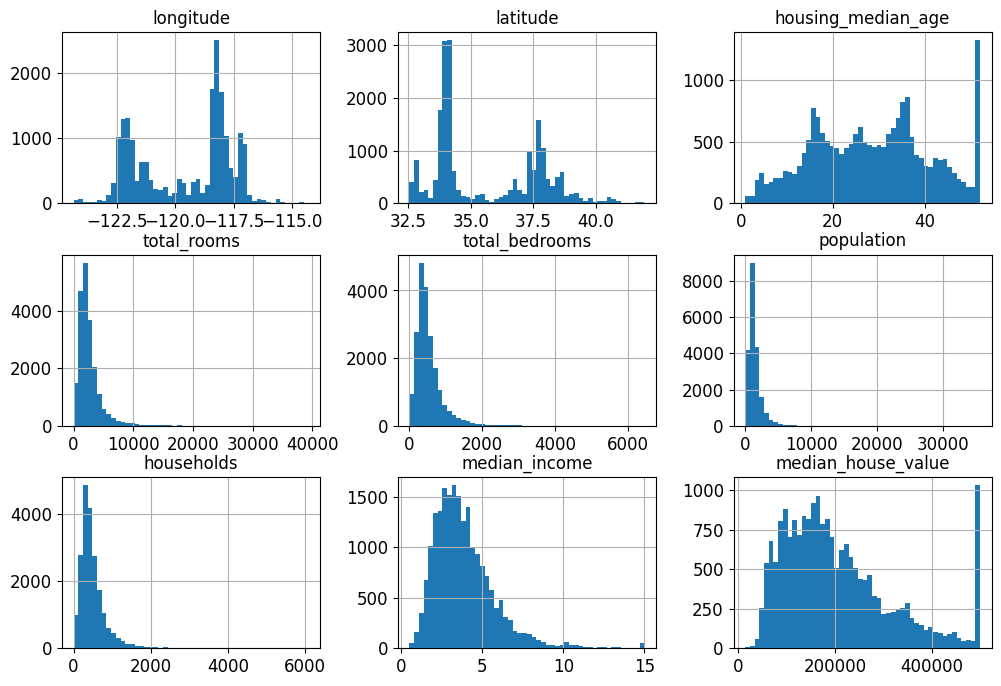

In [16]:
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(12,8))
plt.show()

In [17]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc([test_indices])

In [25]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id: is_id_in_test_set(id, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]



In [26]:
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

print("Training length: ",len(train_set))
print("Test length: ",len(test_set))

Training length:  16512
Test length:  4128
